Accuracy: 0.93%


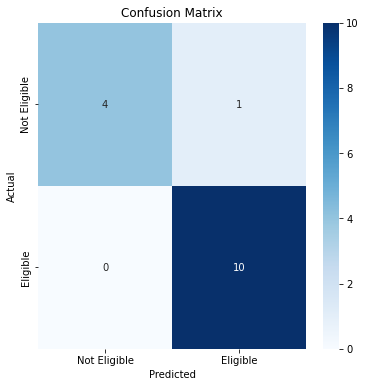

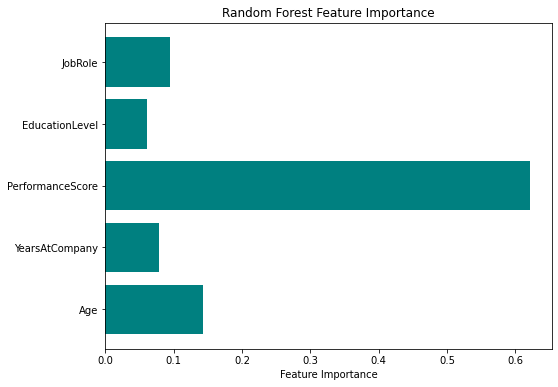

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('promotion.csv')
# Preprocessing: Convert categorical data to numeric using LabelEncoder
le_education = LabelEncoder()
le_jobrole = LabelEncoder()

df['EducationLevel'] = le_education.fit_transform(df['EducationLevel'])
df['JobRole'] = le_jobrole.fit_transform(df['JobRole'])

# Features and Target Variable
X = df[['Age', 'YearsAtCompany', 'PerformanceScore', 'EducationLevel', 'JobRole']]  # Feature columns
y = df['EligibleForPromotion'].apply(lambda x: 1 if x == 'Yes' else 0)  # Target variable (binary: Yes=1, No=0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance Visualization
feature_importance = rf.feature_importances_
features = X.columns
plt.figure(figsize=(8, 6))
plt.barh(features, feature_importance, color='teal')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()
